# 256

In [ ]:
MAX_LEN = 64
dim1 = 256
dim2 = 64

total_pixels = dim1 * dim2

In [ ]:
#COSTANTI E DICHIARAZIONI

database_list = list()
db_cropped = list()
db_interpolated = list()
filename_list = list()

#LETTURA E RESIZE IMMAGINI

#Aggiungo i valori alle liste leggendo i vari files
for filename in glob.glob('*.npy'):
  temp_img = np.load(filename)
  database_list.append(temp_img)

  temp_img_crop = temp_img
  #temp_img_crop = temp_img_crop.reshape((-1, MAX_LEN)).astype(np.uint16)
  #flattening
  temp_img_crop = temp_img_crop.flatten()
  dimensione = temp_img_crop.size

  #padding fino alla dimensione dim1xdim2
  #o crop fino a dim1xdim2 pixels
  if dimensione < total_pixels:
    temp_img_crop = np.pad(temp_img_crop, (0, total_pixels - dimensione), mode='constant',constant_values=0)
  elif dimensione >= total_pixels:
    temp_img_crop = temp_img_crop[0:total_pixels]
  else:
    raise ValueError("Error in reading images.")

  temp_img_crop = temp_img_crop.reshape((dim1, dim2))
  db_cropped.append(temp_img_crop)

  temp_img = temp_img.reshape((-1, MAX_LEN)).astype('float32')
  temp_img_interp = temp_img
  temp_img_interp = cv2.resize(temp_img_interp, (dim2, dim1), interpolation=cv2.INTER_CUBIC)
  db_interpolated.append(temp_img_interp)

  #Salvo il file name
  filename_list.append(extract_name(filename))

In [ ]:
'''
for i in range(100):#49 lungo, 61 medio, 46 piccolo
  print(i, filename_list[i])
'''
print(filename_list[46])
print(filename_list[49])
print(filename_list[61])

strcat-EncodeArithmetic-RandomFuns-Flatten
fair_warning-Flatten-InitEntropy-RandomFuns
hello_world-Flatten-InitOpaque-InitImplicitFlow


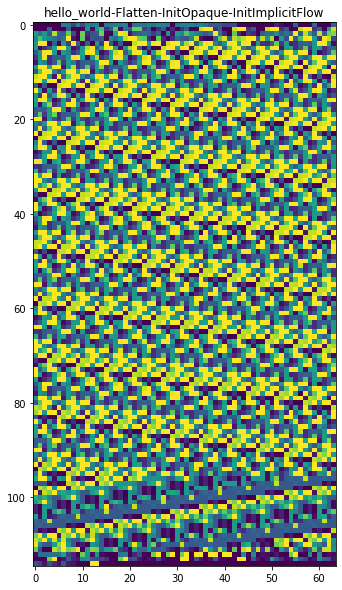

In [ ]:
pos = 61
plt.figure(figsize=(10,10))
plt.imshow(database_list[pos])
#plt.colorbar()
plt.grid(False)
plt.title(filename_list[pos])
plt.show()

#L'etichetta è un intero tra 0 e 9

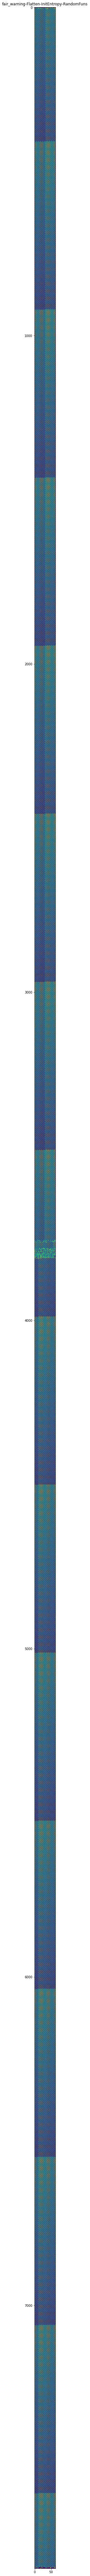

In [ ]:
pos = 49
plt.figure(figsize=(10,150))
plt.imshow(database_list[pos])
#plt.colorbar()
plt.grid(False)
plt.title(filename_list[pos])
plt.show()

#L'etichetta è un intero tra 0 e 9

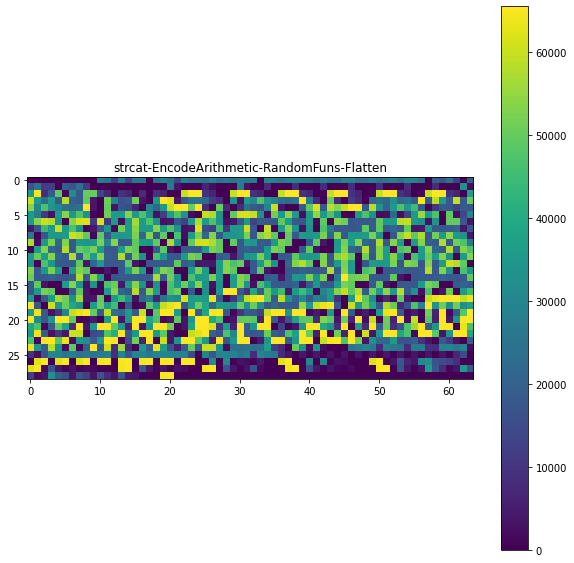

In [ ]:
pos = 46
plt.figure(figsize=(10,10))
plt.imshow(database_list[pos])
plt.colorbar()
plt.grid(False)
plt.title(filename_list[pos])
plt.show()

#L'etichetta è un intero tra 0 e 9

In [ ]:
immagini_esame = list()
immagini_esame.append(database_list[46])
immagini_esame.append(database_list[49])
immagini_esame.append(database_list[61])

labels_esame = list()
labels_esame.append(filename_list[46])
labels_esame.append(filename_list[49])
labels_esame.append(filename_list[61])

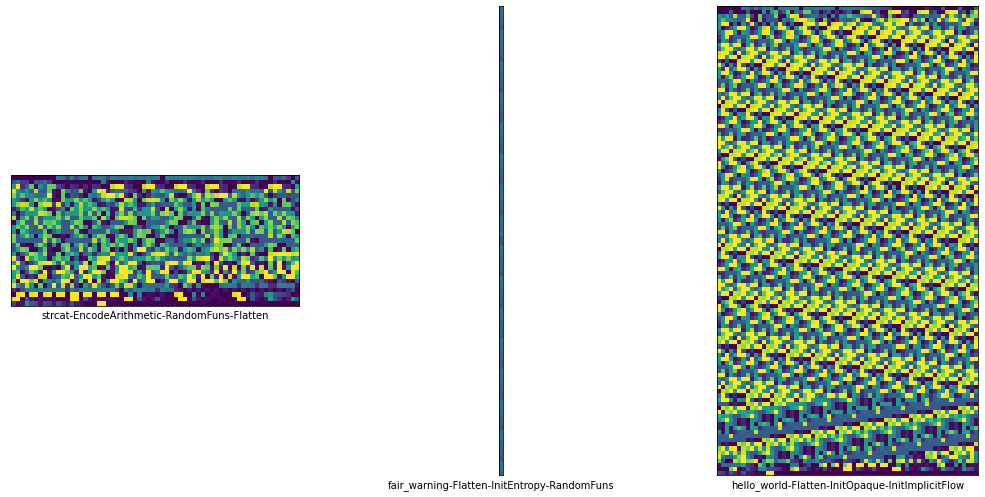

In [ ]:
plt.figure(figsize=(30,50))
for i in range(3):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(immagini_esame[i])#, cmap=plt.cm.binary)
    plt.xlabel(labels_esame[i])
plt.show()

In [ ]:
immagini_piccole = list()
immagini_piccole.append(database_list[46])
immagini_piccole.append(db_cropped[46])
immagini_piccole.append(db_interpolated[46])

labels_piccole = list()
labels_piccole.append(filename_list[46]+", STD")
labels_piccole.append(filename_list[46]+", CROPPED")
labels_piccole.append(filename_list[46]+", INTERPOLATED")

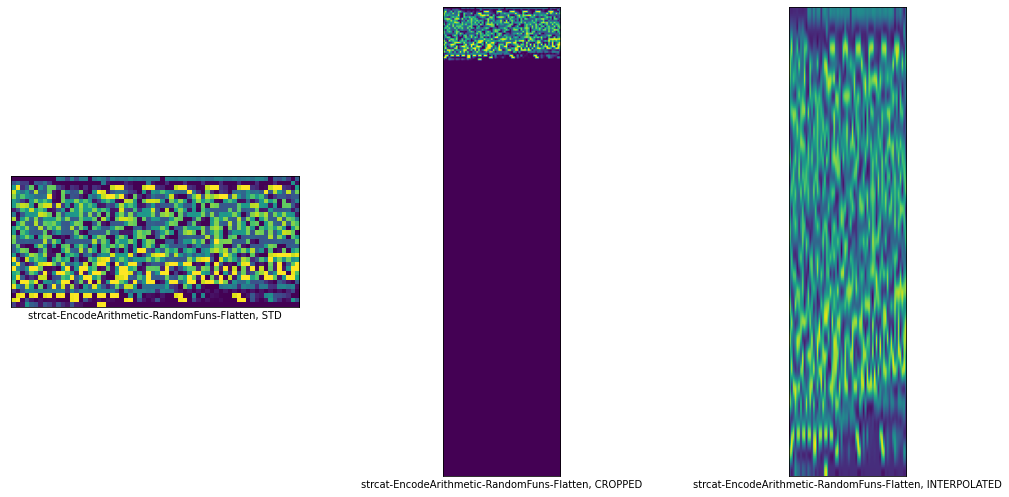

In [ ]:
plt.figure(figsize=(30,50))
for i in range(3):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(immagini_piccole[i])#, cmap=plt.cm.binary)
    plt.xlabel(labels_piccole[i])
plt.show()

In [ ]:
immagini_grandi = list()
immagini_grandi.append(database_list[49])
immagini_grandi.append(db_cropped[49])
immagini_grandi.append(db_interpolated[49])

labels_grandi = list()
labels_grandi.append(filename_list[49]+", STD")
labels_grandi.append(filename_list[49]+", CROP")
labels_grandi.append(filename_list[49]+", INTERP")

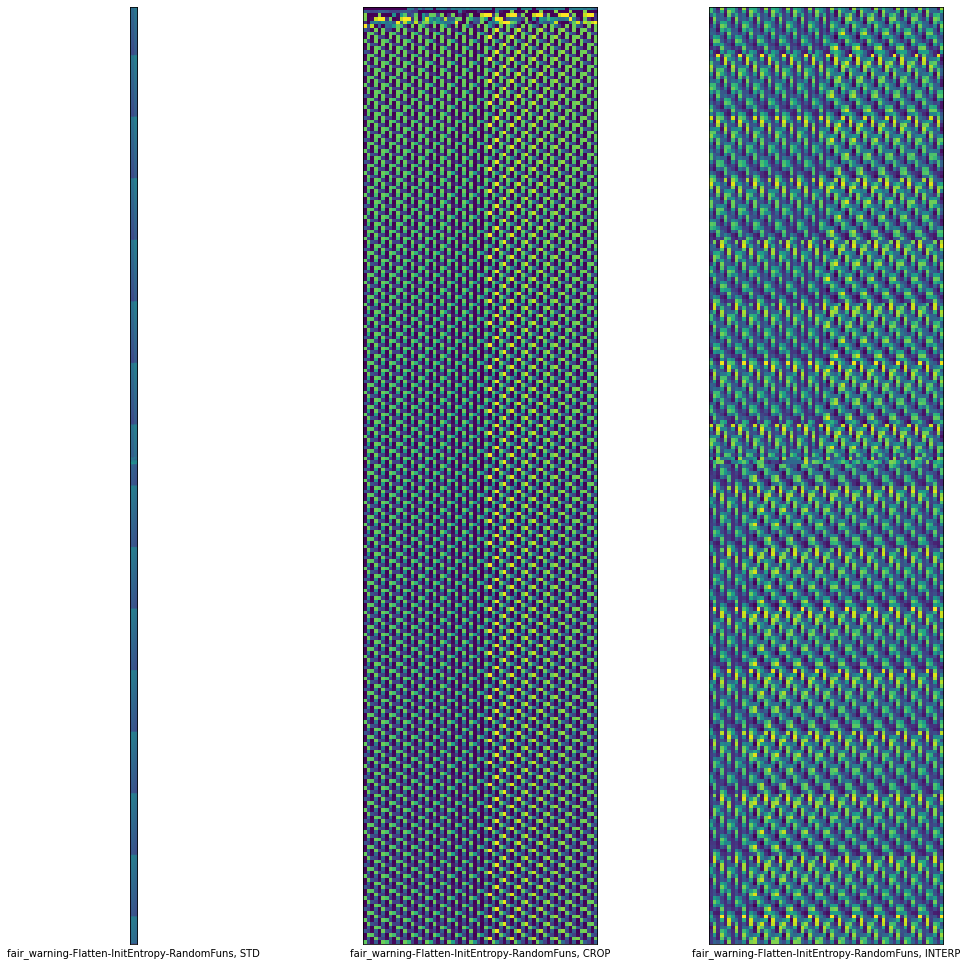

In [ ]:
plt.figure(figsize=(30,100))
for i in range(3):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(immagini_grandi[i])#, cmap=plt.cm.binary)
    plt.xlabel(labels_grandi[i])
plt.show()

In [ ]:
immagini_medie = list()
immagini_medie.append(database_list[61])
immagini_medie.append(db_cropped[61])
immagini_medie.append(db_interpolated[61])

labels_medie = list()
labels_medie.append(filename_list[61]+", STD")
labels_medie.append(filename_list[61]+", CROP")
labels_medie.append(filename_list[61]+", INTERP")

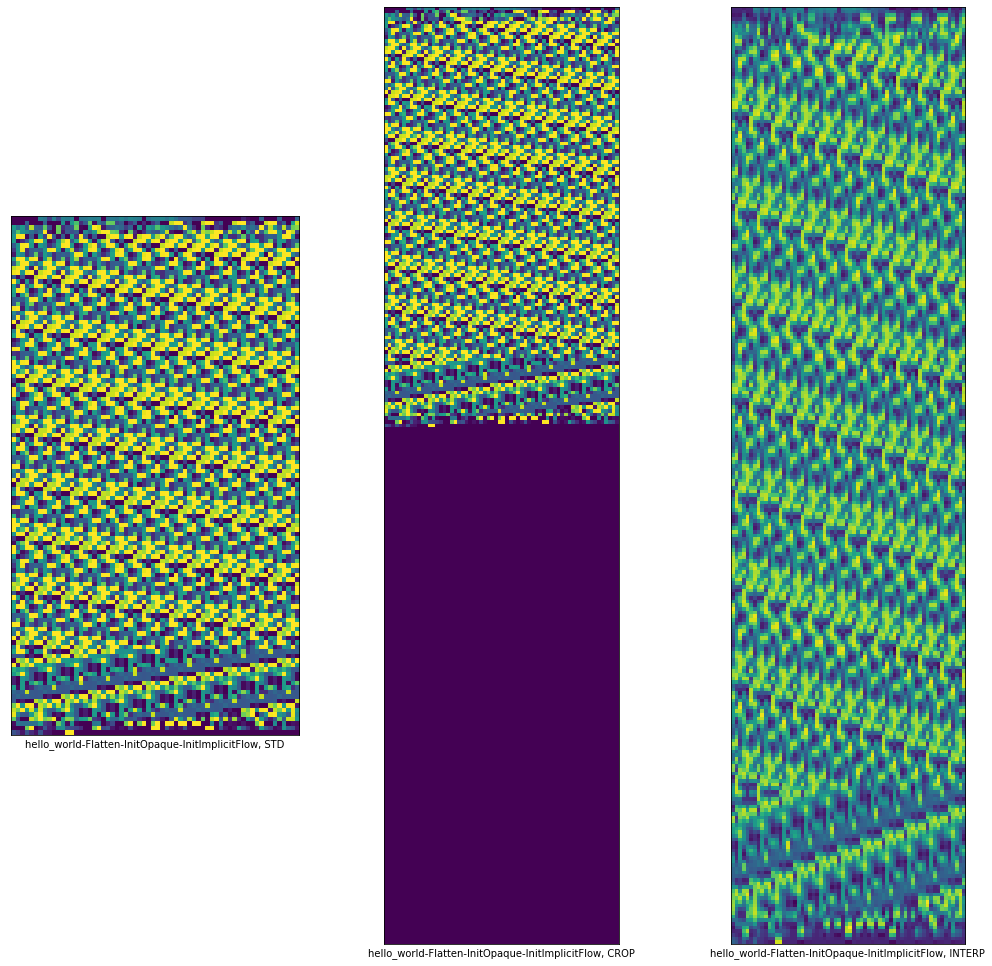

In [ ]:
plt.figure(figsize=(30,100))
for i in range(3):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(immagini_medie[i])#, cmap=plt.cm.binary)
    plt.xlabel(labels_medie[i])
plt.show()

In [1]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [1]:
import tensorflow as tf
from tensorflow import keras as ks

import numpy as np
import pandas as pd

from sklearn.preprocessing import LabelEncoder
from skimage.transform import resize
from sklearn.metrics import confusion_matrix

import cv2

#Per data visualization
import seaborn as sns

from matplotlib import pyplot as plt

import glob
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import os, os.path

import time
import math
import statistics

import operator

from collections import defaultdict

print(tf.__version__)

2.3.0


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#Extract the full file name
def extract_name(from_string):
  to_pos = from_string.index('.')
  substring = from_string[0:to_pos]
  return substring

In [3]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

downloaded = drive.CreateFile({'id':"18ESID3MpwG-SzZPE1EENzsGPh8vl8ti9"})   # replace the id with id of file you want to access
downloaded.GetContentFile('data_18k.zip')        # replace the file name with your file

!unzip -q data_18k.zip -d DB_Repo/

path, dirs, files = next(os.walk("/content/DB_Repo/data"))
file_count = len(files)
#Should be 18800
print(file_count)

%cd /content/DB_Repo/data
!pwd

print("Done")

18800
/content/DB_Repo/data
/content/DB_Repo/data
Done


# 128

In [71]:
MAX_LEN = 64
dim1 = 128
dim2 = 64

total_pixels = dim1 * dim2

In [72]:
#COSTANTI E DICHIARAZIONI

database_list = list()
db_cropped = list()
db_interpolated = list()
filename_list = list()

#LETTURA E RESIZE IMMAGINI

#Aggiungo i valori alle liste leggendo i vari files
for filename in glob.glob('*.npy'):
  temp_img = np.load(filename)
  database_list.append(temp_img)

  temp_img_crop = temp_img
  #temp_img_crop = temp_img_crop.reshape((-1, MAX_LEN)).astype(np.uint16)
  #flattening
  temp_img_crop = temp_img_crop.flatten()
  dimensione = temp_img_crop.size

  #padding fino alla dimensione dim1xdim2
  #o crop fino a dim1xdim2 pixels
  if dimensione < total_pixels:
    temp_img_crop = np.pad(temp_img_crop, (0, total_pixels - dimensione), mode='constant',constant_values=0)
  elif dimensione >= total_pixels:
    temp_img_crop = temp_img_crop[0:total_pixels]
  else:
    raise ValueError("Error in reading images.")

  temp_img_crop = temp_img_crop.reshape((dim1, dim2))
  db_cropped.append(temp_img_crop)

  temp_img = temp_img.reshape((-1, MAX_LEN)).astype('float32')
  temp_img_interp = temp_img
  temp_img_interp = cv2.resize(temp_img_interp, (dim2, dim1), interpolation=cv2.INTER_CUBIC)
  db_interpolated.append(temp_img_interp)

  #Salvo il file name
  filename_list.append(extract_name(filename))

In [73]:
'''
for i in range(100):#49 lungo, 61 medio, 46 piccolo
  print(i, filename_list[i])
'''
print(filename_list[46])
print(filename_list[49])
print(filename_list[61])

strcat-EncodeArithmetic-RandomFuns-Flatten
fair_warning-Flatten-InitEntropy-RandomFuns
hello_world-Flatten-InitOpaque-InitImplicitFlow


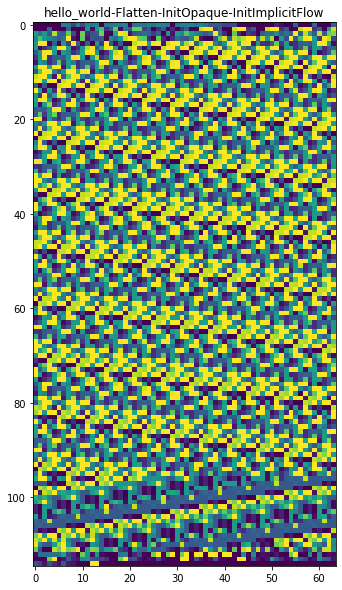

In [74]:
pos = 61
plt.figure(figsize=(10,10))
plt.imshow(database_list[pos])
#plt.colorbar()
plt.grid(False)
plt.title(filename_list[pos])
plt.show()

#L'etichetta è un intero tra 0 e 9

In [75]:
pos = 49
plt.figure(figsize=(10,150))
plt.imshow(database_list[pos])
#plt.colorbar()
plt.grid(False)
plt.title(filename_list[pos])
plt.show()

#L'etichetta è un intero tra 0 e 9

Output hidden; open in https://colab.research.google.com to view.

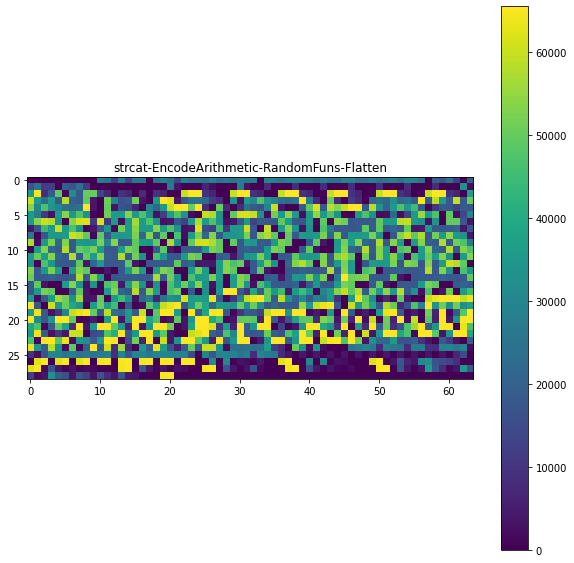

In [76]:
pos = 46
plt.figure(figsize=(10,10))
plt.imshow(database_list[pos])
plt.colorbar()
plt.grid(False)
plt.title(filename_list[pos])
plt.show()

#L'etichetta è un intero tra 0 e 9

In [77]:
immagini_esame = list()
immagini_esame.append(database_list[46])
immagini_esame.append(database_list[49])
immagini_esame.append(database_list[61])

labels_esame = list()
labels_esame.append(filename_list[46])
labels_esame.append(filename_list[49])
labels_esame.append(filename_list[61])

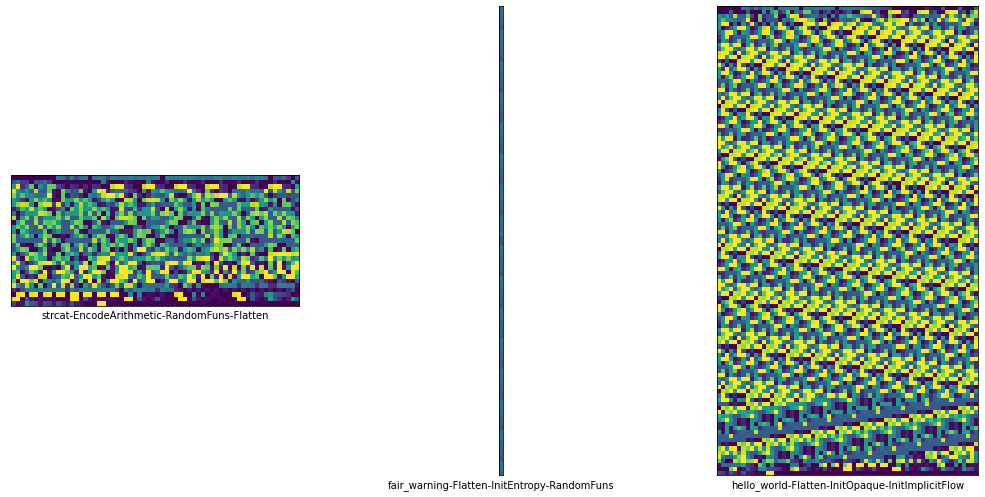

In [78]:
plt.figure(figsize=(30,50))
for i in range(3):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(immagini_esame[i])#, cmap=plt.cm.binary)
    plt.xlabel(labels_esame[i])
plt.show()

In [79]:
immagini_piccole = list()
immagini_piccole.append(database_list[46])
immagini_piccole.append(db_cropped[46])
immagini_piccole.append(db_interpolated[46])

labels_piccole = list()
labels_piccole.append(filename_list[46]+", STD")
labels_piccole.append(filename_list[46]+", CROPPED")
labels_piccole.append(filename_list[46]+", INTERPOLATED")

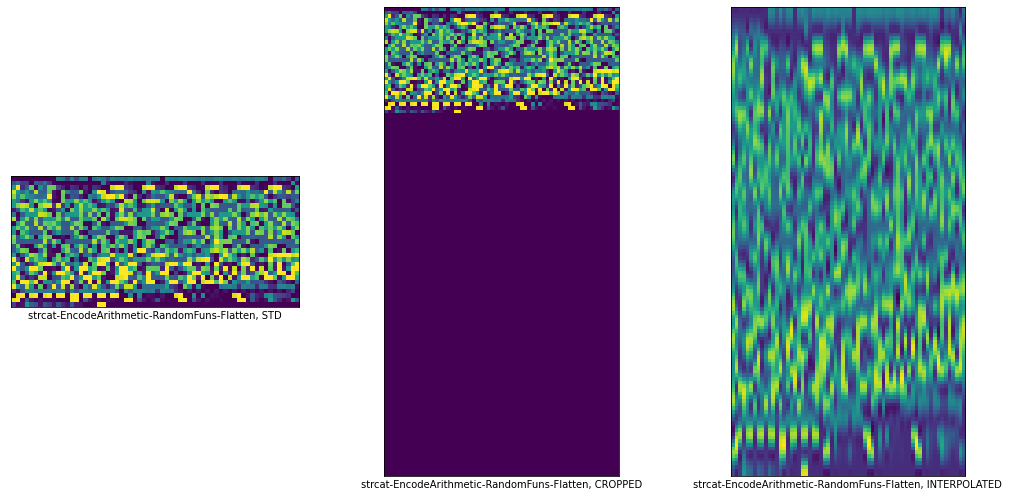

In [80]:
plt.figure(figsize=(30,50))
for i in range(3):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(immagini_piccole[i])#, cmap=plt.cm.binary)
    plt.xlabel(labels_piccole[i])
plt.show()

In [81]:
immagini_grandi = list()
immagini_grandi.append(database_list[49])
immagini_grandi.append(db_cropped[49])
immagini_grandi.append(db_interpolated[49])

labels_grandi = list()
labels_grandi.append(filename_list[49]+", STD")
labels_grandi.append(filename_list[49]+", CROP")
labels_grandi.append(filename_list[49]+", INTERP")

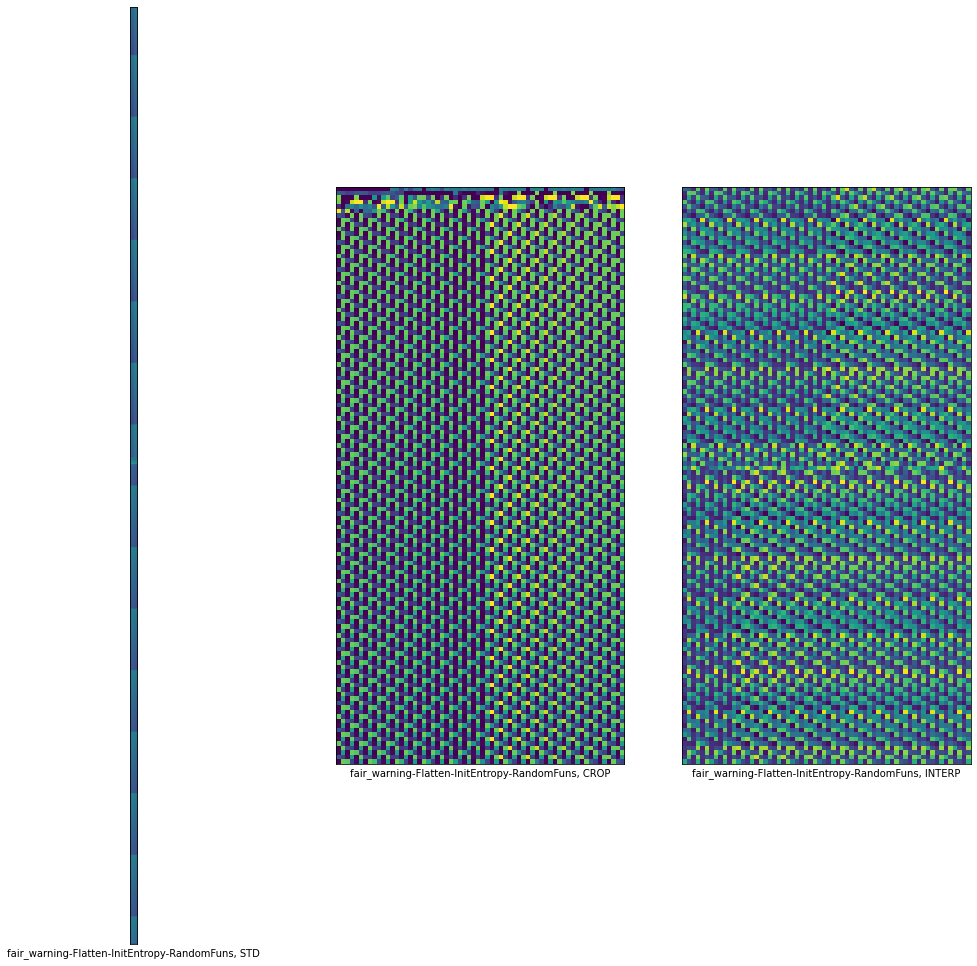

In [82]:
plt.figure(figsize=(30,100))
for i in range(3):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(immagini_grandi[i])#, cmap=plt.cm.binary)
    plt.xlabel(labels_grandi[i])
plt.show()

In [83]:
immagini_medie = list()
immagini_medie.append(database_list[61])
immagini_medie.append(db_cropped[61])
immagini_medie.append(db_interpolated[61])

labels_medie = list()
labels_medie.append(filename_list[61]+", STD")
labels_medie.append(filename_list[61]+", CROP")
labels_medie.append(filename_list[61]+", INTERP")

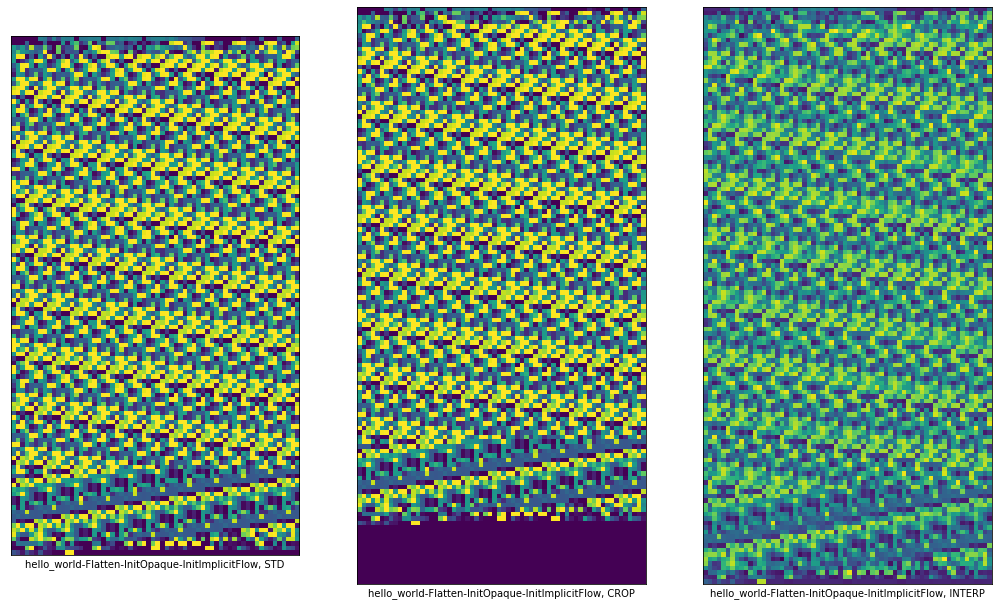

In [84]:
plt.figure(figsize=(30,100))
for i in range(3):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(immagini_medie[i])#, cmap=plt.cm.binary)
    plt.xlabel(labels_medie[i])
plt.show()